# Fixed Spot Histogram Evaluation

We are now looking into the `FixedSpotHistogramEvaluation` which inherits `FixedSpotDetectionEvaluation`

In [34]:
%load_ext autoreload
%autoreload 2
    
import sys
import numpy as np
from pathlib import Path

project_root = Path().absolute().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from matplotlib import pyplot as plt

%matplotlib ipympl

from pyeval import TransformDataset, GzipPickleDataset, FixedSpotHistogramEvaluation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dataset = GzipPickleDataset("/tmp/AA_clock_spect_0G")
len(dataset)

767

In [3]:
evaluation = FixedSpotHistogramEvaluation(spot_num=16, spot_radius=3, spot_counts_bins=100)
evaluation.evaluate(dataset)

shapes (2, 16, 100) (2, 16, 100)


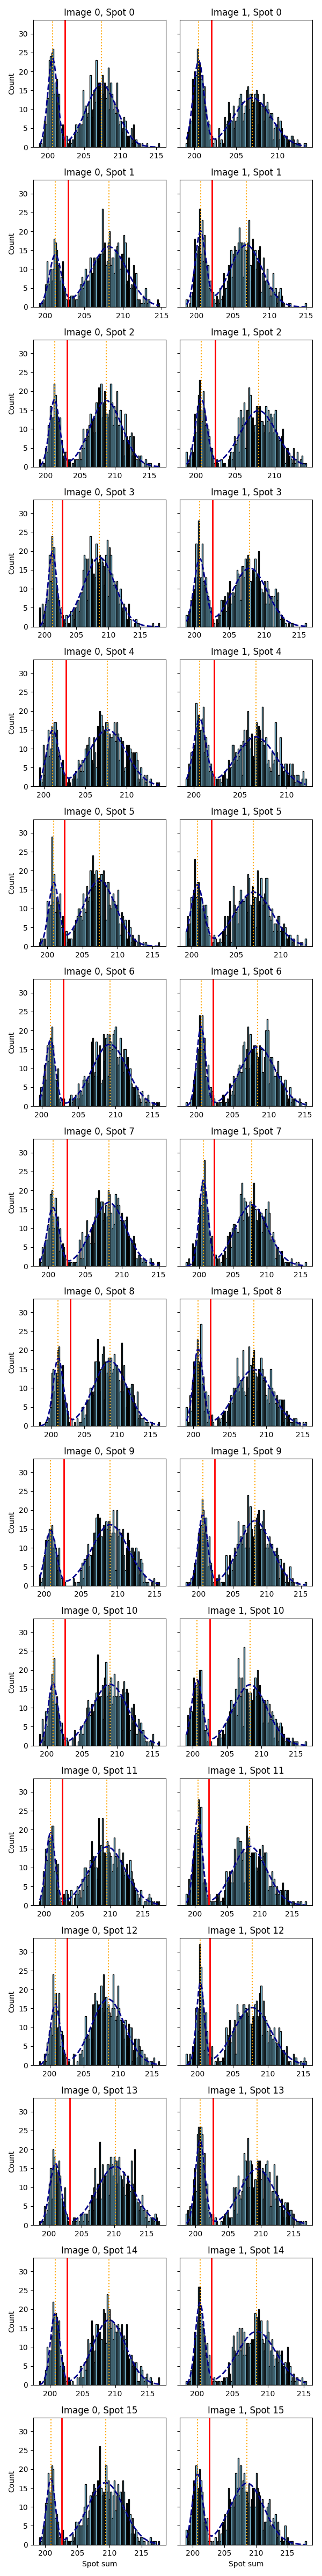

In [4]:
evaluation.plot_spot_sums_histograms()

The `spots` following `np.array` encodes if we detected an atom or not.

In [5]:
evaluation.spots.shape

(767, 2, 16)

Let us visualize a few of the images.

In [6]:
def render_bools(a, filled='●', empty=' '):
    print("\n".join(''.join(filled if v else empty for v in row) for row in np.atleast_2d(a)))


In [7]:
render_bools(evaluation.spots[1])

●●●●●● ●● ●  ●  
●●●●●● ●● ●● ●  


We note that the second image seems to show more spots than the first one - suggesting that the spot was below the threshold in the first image.

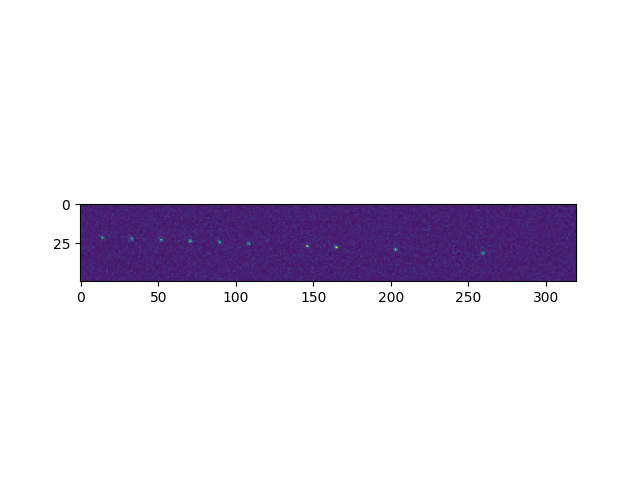

In [8]:
plt.figure()
plt.imshow(dataset[1]["image"][0])
plt.show()

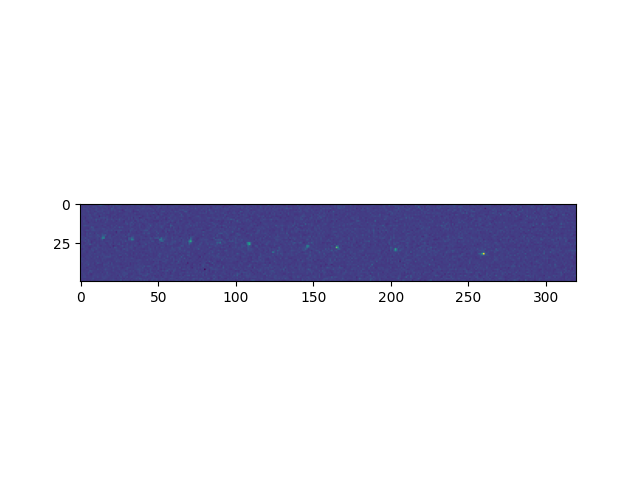

In [9]:
plt.figure()
plt.imshow(dataset[1]["image"][1])
plt.show()

We can correct for this error via:

In [1]:
spots = evaluation.spots.copy()
spots[:, 0, :] |= spots[:, 1, :] 

NameError: name 'evaluation' is not defined

In [33]:
for i in range(10):
    render_bools(spots[i])
    print("")

●●●● ● ●●●● ●●● 
●●●● ● ●●●● ●●● 

●●●●●● ●● ●● ●  
●●●●●● ●● ●● ●  

●●  ●●●●●●●●●●●●
●●  ●●●●●●●●●●●●

●●●●●●●●● ●● ●●●
●●●●●●●●● ●● ●●●

●  ●●●● ● ●●●●●●
   ●●●● ● ● ●●●●

●●●●  ●●●● ●●●●●
●●●●  ●●●● ●●●● 

●●●● ●● ● ●●●●● 
●●●● ●● ● ●●●●● 

 ●●●●●●●●●●●●●●●
 ●●●●●●●●●●●●●●●

  ●●●● ● ●●●●●●●
  ●●●● ● ●● ●●●●

 ●●●●●●●● ●●●●●●
 ●●●●●●●● ●●●●●●

